<a href="https://colab.research.google.com/github/benvictoria17/DataAnalytics/blob/master/CS%20Books%20EDA%20%26%20Visualization%20%26%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [82]:
prog_books=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Top%20270%20Computer%20Science%20%3A%20Programing%20Books/prog_book.csv")
df=prog_books.copy()
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [84]:
df.dtypes

Rating             float64
Reviews             object
Book_title          object
Description         object
Number_Of_Pages      int64
Type                object
Price              float64
dtype: object

In [85]:
df.shape

(271, 7)

In [86]:
df.columns

Index(['Rating', 'Reviews', 'Book_title', 'Description', 'Number_Of_Pages',
       'Type', 'Price'],
      dtype='object')

In [87]:
df[df.duplicated() == True]

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price


In [88]:
df.isnull().values.any()

False

In [89]:
df.isnull().sum()

Rating             0
Reviews            0
Book_title         0
Description        0
Number_Of_Pages    0
Type               0
Price              0
dtype: int64

In [90]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Rating,0,0.0
Reviews,0,0.0
Book_title,0,0.0
Description,0,0.0
Number_Of_Pages,0,0.0
Type,0,0.0
Price,0,0.0


In [91]:
df['Reviews']=df['Reviews'].map(lambda x: x.replace(',',''))
df['Reviews']=pd.to_numeric(df['Reviews'])

In [92]:
df.Reviews.value_counts()

0       22
1       16
3        8
2        8
11       7
        ..
120      1
108      1
2629     1
115      1
14       1
Name: Reviews, Length: 133, dtype: int64

In [93]:
df_no_0=df[df["Reviews"]>0]
df_no_0.mean()

Rating               4.087671
Reviews            201.951807
Number_Of_Pages    475.554217
Price               53.150862
dtype: float64

In [94]:
fig = go.Figure(data=[go.Histogram(x=df['Rating'],  
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, 
                      end=5,  
                      size=0.25   
                      ))])
fig.update_layout(title="Distribution Of Rating",xaxis_title="Rating",yaxis_title="Counts",title_x=0.5)
fig.show()

In [95]:
fig = px.histogram(df, x="Rating", color="Type", marginal="rug", # can be `box`, `violin`
                         hover_data=["Book_title","Type","Price"])
fig.update_layout(title = "Rating Distribution With Type ",title_x=0.5,
                 xaxis_title="Rating",yaxis_title="Count")
fig.show()

In [96]:
min_Rating=df['Rating'].min()
max_Rating=df['Rating'].max()
avg_rate_rating=df['Rating'].mean()
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  min_Rating,
    domain = {'x': [0.25, 1], 'y': [0.4, 0.6]},
    title = {'text': "Min Rating",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 5]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = max_Rating,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.9]},
    title = {'text': "Max Rating",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,5]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = avg_rate_rating,
    domain = {'x': [0.25, 1], 'y': [0.1, 0.3]},
    title = {'text' :"Mean Rating ",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,5]},
        'bar': {'color': "Gold"}}
))
fig.update_layout(title=" Statistics Of Ratings Of Books  ",title_x=0.5)
fig.show()

In [97]:
df_Rating_Book_title=df[["Rating","Book_title","Reviews"]]
df_Rating_Book_title=df_Rating_Book_title.sort_values("Rating",ascending=False)[0:10]


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=(" Fake Top 10 Reviewed Book Counts",
                                   "Fake Top 10 Rating Books ",))  # Subplot titles

fig.add_trace(go.Bar(
    y=df_Rating_Book_title['Book_title'],x=df_Rating_Book_title['Reviews'],
    name="Review Counts",
    orientation="h",
    marker={'color': df_Rating_Book_title['Rating'], 
    'colorscale': 'solar'},
    text=df_Rating_Book_title['Reviews'],
    textposition = "outside"),
    row=1, col=1           
)
fig.add_trace(go.Bar(
    y=df_Rating_Book_title['Book_title'],x=df_Rating_Book_title['Rating'],
    name="Rating Books",
    orientation="h",
    marker={'color': df_Rating_Book_title['Rating'], 
    'colorscale': 'darkmint'},
    text=df_Rating_Book_title['Rating'],
    textposition = "outside"),
    row=2, col=1           
)

fig.update_layout(height=800, width=600,title ="Books Ratings",title_x=0.5)
fig.show()

In [98]:
df_Rating_Book_title=df[["Rating","Book_title","Reviews"]]
filter_N_O_P=df_Rating_Book_title[df_Rating_Book_title["Reviews"]>250]
filter_N_O_P=filter_N_O_P.sort_values("Rating",ascending=False)[0:10]

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=(" Top 10 Reviewed Book Counts",
                                   " Top 10 Rating Books ",))  # Subplot titles

fig.add_trace(go.Bar(
    y=filter_N_O_P['Book_title'],x=filter_N_O_P['Reviews'],
    name="Review Counts",
    orientation="h",
    marker={'color': filter_N_O_P['Rating'], 
    'colorscale': 'haline'},
    text=filter_N_O_P['Reviews'],
    textposition = "outside"),
    row=1, col=1           
)
fig.add_trace(go.Bar(
    y=filter_N_O_P['Book_title'],x=filter_N_O_P['Rating'],
    name="Rating Books",
    orientation="h",
    marker={'color': filter_N_O_P['Rating'], 
    'colorscale': 'tropic'},
    text=filter_N_O_P['Rating'],
    textposition = "outside"),
    row=2, col=1           
)

fig.update_layout(height=800, width=600,title =" Best Books ",title_x=0.5)
fig.show()

In [99]:
df_Rating_Book_title=df[["Rating","Book_title","Reviews"]]
filter_N_O_P=df_Rating_Book_title[df_Rating_Book_title["Reviews"]>250]
filter_N_O_P=filter_N_O_P.sort_values("Rating",ascending=True)[0:5]

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("  Worst 5 Reviewed Book Counts",
                                   "  Worst 5 Rating Books ",))  # Subplot titles

fig.add_trace(go.Bar(
    y=filter_N_O_P['Book_title'],x=filter_N_O_P['Reviews'],
    name="Review Counts",
    orientation="h",
    marker={'color': filter_N_O_P['Rating'], 
    'colorscale': 'haline'},
    text=filter_N_O_P['Reviews'],
    textposition = "outside"),
    row=1, col=1           
)
fig.add_trace(go.Bar(
    y=filter_N_O_P['Book_title'],x=filter_N_O_P['Rating'],
    name="Rating Books",
    orientation="h",
    marker={'color': filter_N_O_P['Rating'], 
    'colorscale': 'tropic'},
    text=filter_N_O_P['Rating'],
    textposition = "outside"),
    row=2, col=1           
)

fig.update_layout(height=800, width=700,title =" Worst Books",title_x=0.5)
fig.show()

In [100]:
df_type=df['Type'].value_counts().to_frame().reset_index().rename(columns={'index':'Type','Type':'count'})


fig = go.Figure(go.Bar(
    x=df_type['Type'],y=df_type['count'],
    marker={'color': df_type['count'], 
    'colorscale': 'inferno'},  
    text=df_type['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Type Count',xaxis_title="Type",yaxis_title="Count",title_x=0.5)
fig.update_xaxes(
        tickangle = 45,
        )
fig.show()

In [101]:
df_type=df['Type'].value_counts().to_frame().reset_index().rename(columns={'index':'Type','Type':'count'})

colors=['Bisque','darkcyan',"Brown","cyan","coral","darkblue"]

fig = go.Figure([go.Pie(labels=df_type['Type'], values=df_type['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Type Count",title_x=0.5)
fig.show()

In [102]:
df_type_max=df.groupby(by =['Type'])['Rating'].max().to_frame().reset_index().rename(columns={'Type':'Type','Rating':'max'})
df_type_mean=df.groupby(by =['Type'])['Rating'].mean().to_frame().reset_index().rename(columns={'Type':'Type1','Rating':'mean'})
df_type_min=df.groupby(by =['Type'])['Rating'].min().to_frame().reset_index().rename(columns={'Type':'Type2','Rating':'min'})
df_type_count=df.groupby(by =['Type'])['Rating'].count().to_frame().reset_index().rename(columns={'Type':'Type3','Rating':'count'})

result = pd.concat([df_type_max, df_type_mean,df_type_min,df_type_count], axis=1)
result.drop(['Type1','Type2','Type3'],inplace=True,axis=1)
result["max"]=result["max"].map(lambda x:round(x,2))
result["mean"]=result["mean"].map(lambda x:round(x,2))
result["min"]=result["min"].map(lambda x:round(x,2))

fig = make_subplots(rows=4, cols=1,
                   subplot_titles=(" Mean Rating",
                                   " Min Rating",
                                   " Max Rating",
                                   " Count Books"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Type'],y=result['mean'],
    name="Mean",
    marker={'color': result['mean'], 
    'colorscale': 'fall'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['min'],
    name="Min",
    marker={'color': result['min'], 
    'colorscale': 'fall'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['max'],
    name="Max",
    marker={'color': result['max'], 
    'colorscale': 'fall'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['count'],
    name="Count",
    marker={'color': result['count'], 
    'colorscale': 'fall'},  
    text=result['count'],
    textposition = "inside"),
    row=4, col=1           
)
fig.update_layout(title = "Type With Rating",title_x=0.5)
fig.update_xaxes(
        tickangle = 0,
        )
fig.show()

In [103]:
df_type_max=df.groupby(by =['Type'])['Price'].max().to_frame().reset_index().rename(columns={'Type':'Type','Price':'max'})
df_type_mean=df.groupby(by =['Type'])['Price'].mean().to_frame().reset_index().rename(columns={'Type':'Type1','Price':'mean'})
df_type_min=df.groupby(by =['Type'])['Price'].min().to_frame().reset_index().rename(columns={'Type':'Type2','Price':'min'})
result = pd.concat([df_type_max, df_type_mean,df_type_min], axis=1)
result.drop(['Type1','Type2',],inplace=True,axis=1)
result["max"]=result["max"].map(lambda x:round(x,2))
result["mean"]=result["mean"].map(lambda x:round(x,2))
result["min"]=result["min"].map(lambda x:round(x,2))

fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("  Mean Price",
                                   "  Min Price",
                                   "  Max Price", ))  # Subplot titles
                                 

fig.add_trace(go.Bar(
    x=result['Type'],y=result['mean'],
    name="Mean",
    marker={'color': result['mean'], 
    'colorscale': 'fall'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['min'],
    name="Min",
    marker={'color': result['min'], 
    'colorscale': 'fall'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['max'],
    name="Max",
    marker={'color': result['max'], 
    'colorscale': 'fall'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)

fig.update_layout(title = "Type With Price",title_x=0.5)
fig.update_xaxes(
        tickangle = 0,
        )
fig.show()

In [104]:
df_type_max=df.groupby(by =['Type'])['Number_Of_Pages'].max().to_frame().reset_index().rename(columns={'Type':'Type','Number_Of_Pages':'max'})
df_type_mean=df.groupby(by =['Type'])['Number_Of_Pages'].mean().to_frame().reset_index().rename(columns={'Type':'Type1','Number_Of_Pages':'mean'})
df_type_min=df.groupby(by =['Type'])['Number_Of_Pages'].min().to_frame().reset_index().rename(columns={'Type':'Type2','Number_Of_Pages':'min'})
result = pd.concat([df_type_max, df_type_mean,df_type_min], axis=1)
result.drop(['Type1','Type2',],inplace=True,axis=1)
result["max"]=result["max"].map(lambda x:round(x,2))
result["mean"]=result["mean"].map(lambda x:round(x,2))
result["min"]=result["min"].map(lambda x:round(x,2))
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=(" Mean Number Of Pages",
                                   " Min Number Of Pages",
                                   " Max Number Of Pages", ))  # Subplot titles                          

fig.add_trace(go.Bar(
    x=result['Type'],y=result['mean'],
     name='Mean',
    marker={'color': result['mean'], 
    'colorscale': 'fall'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['min'],
    name='Min',
    marker={'color': result['min'], 
    'colorscale': 'fall'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Type'],y=result['max'],
    name='Max',
    marker={'color': result['max'], 
    'colorscale': 'fall'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)

fig.update_layout(title = "Type With Number Of Pages",title_x=0.5)
fig.update_xaxes(
        tickangle = 0,
        )
fig.show()

In [105]:
fig = px.histogram(df, x="Reviews", color="Type", marginal="rug", 
                         hover_data=["Book_title","Type","Number_Of_Pages"])
fig.update_layout(title = "Reviews Distribution With Type ",title_x=0.5,
                 xaxis_title="Reviews",yaxis_title="Count")
fig.show()

In [106]:
df_r0=df[df["Reviews"]>0]
min_Rating=df_r0["Reviews"].min()
max_Rating=df['Reviews'].max()
avg_rate_rating=df['Reviews'].mean()
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  min_Rating,
    domain = {'x': [0.25, 1], 'y': [0.4, 0.6]},
    title = {'text': "Min Reviews",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 5]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = max_Rating,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.9]},
    title = {'text': "Max Reviews",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,6000]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = avg_rate_rating,
    domain = {'x': [0.25, 1], 'y': [0.1, 0.3]},
    title = {'text' :"Mean Reviews ",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,200]},
        'bar': {'color': "Gold"}}
))
fig.update_layout(title=" Statistics Of Reviews Of Books  ",title_x=0.5)
fig.show()

In [107]:
df_r0=df[df["Reviews"]>0]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_r0["Reviews"],
    name='Reviews',
    marker_color='royalblue',
    boxmean='sd'
))
fig.update_layout(title = "Reviews Distribution ",title_x=0.5,
                 )
fig.show()

In [108]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["Price"],
    name='Price',
    marker_color='royalblue',
    boxmean='sd'
))
fig.update_layout(title = "Price Distribution ",title_x=0.5,
                 )
fig.show()

In [109]:
fig = px.histogram(df, x="Price", color="Type", marginal="rug", # can be `box`, `violin`
                         hover_data=["Book_title","Type","Number_Of_Pages"])
fig.update_layout(title = "Price Distribution With Type ",title_x=0.5,
                 xaxis_title="Price",yaxis_title="Count")
fig.show()

In [110]:
fig = px.box(df, y="Price", color="Type",
             notched=True,
             title="Box Plot Of Price With Type",
             hover_data=["Book_title"] 
            )
fig.update_layout(title_x=0.5)
                 
fig.show()

In [111]:
fig = go.Figure(data=[go.Histogram(x=df['Price'],  
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0,
                      end=250,  
                      size=10  
                      ))])
fig.update_layout(title="Distribution Of Price",xaxis_title="Price",yaxis_title="Counts",title_x=0.5)
fig.show()

In [112]:
min_Rating=df['Price'].min()
max_Rating=df['Price'].max()
avg_rate_rating=df['Price'].mean()
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  min_Rating,
    domain = {'x': [0.25, 1], 'y': [0.4, 0.6]},
    title = {'text': "Min Price",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 10]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = max_Rating,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.9]},
    title = {'text': "Max Price",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,250]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = avg_rate_rating,
    domain = {'x': [0.25, 1], 'y': [0.1, 0.3]},
    title = {'text' :"Mean Price ",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,80]},
        'bar': {'color': "Gold"}}
))
fig.update_layout(title=" Statistics Of Price Of Books  ",title_x=0.5)
fig.show()

In [113]:
fig = px.scatter_matrix(df,
    dimensions=["Rating", "Number_Of_Pages", "Price"],
    color="Type")
fig.update_traces(diagonal_visible=False)
fig.show()

In [114]:
fig = px.treemap(df, path=['Type'], values='Price')
fig.show()

In [115]:
fig = px.scatter(df, x="Price", y="Number_Of_Pages", trendline="ols")
fig.update_layout(title="Price With Number Of Pages",
                  xaxis_title="Price",
                  yaxis_title="Number Of Pages",
                  title_x=0.5)
fig.show()



In [116]:
fig = px.scatter(df, x="Price", y="Rating", trendline="ols")
fig.update_layout(title="Price With Rating",
                  xaxis_title="Price",
                  yaxis_title="Rating",
                  title_x=0.5)
fig.show()

In [117]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["Number_Of_Pages"],
    name='Number Of Pages',
    marker_color='royalblue',
    boxmean='sd' 
))
fig.update_layout(title ="Number Of Pages Distribution",title_x=0.5,
                 )
fig.show()

In [118]:
fig = px.box(df, y="Number_Of_Pages", color="Type",
             notched=True, 
             title="Box Plot Of Number Of Pages With Type",
             hover_data=["Book_title"]
            )
fig.update_layout(title_x=0.5,yaxis_title="Number Of Pages")
                 
fig.show()

In [119]:
fig = px.scatter(df, x="Rating", y="Number_Of_Pages", trendline="ols")
fig.update_layout(title="Rating With Number Of Pages",
                  xaxis_title="Number Of Pages",
                  yaxis_title="Rating",
                  title_x=0.5)
fig.show()


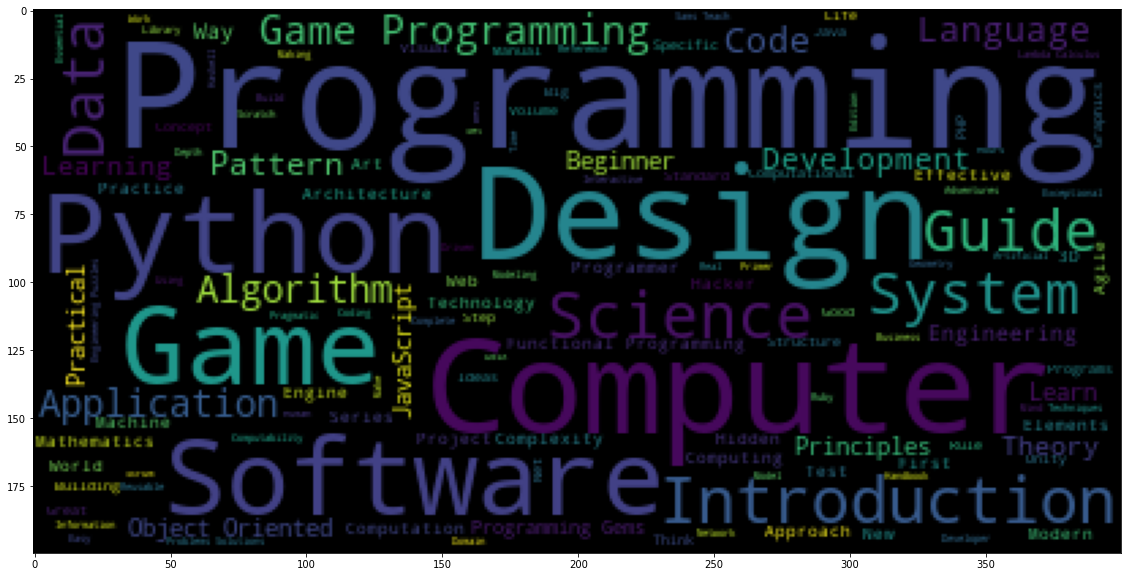

In [120]:
from wordcloud import WordCloud, STOPWORDS
wocl=WordCloud(stopwords=STOPWORDS).generate(" ".join(df["Book_title"].tolist()))
plt.figure(figsize=(25,10))
plt.imshow(wocl)

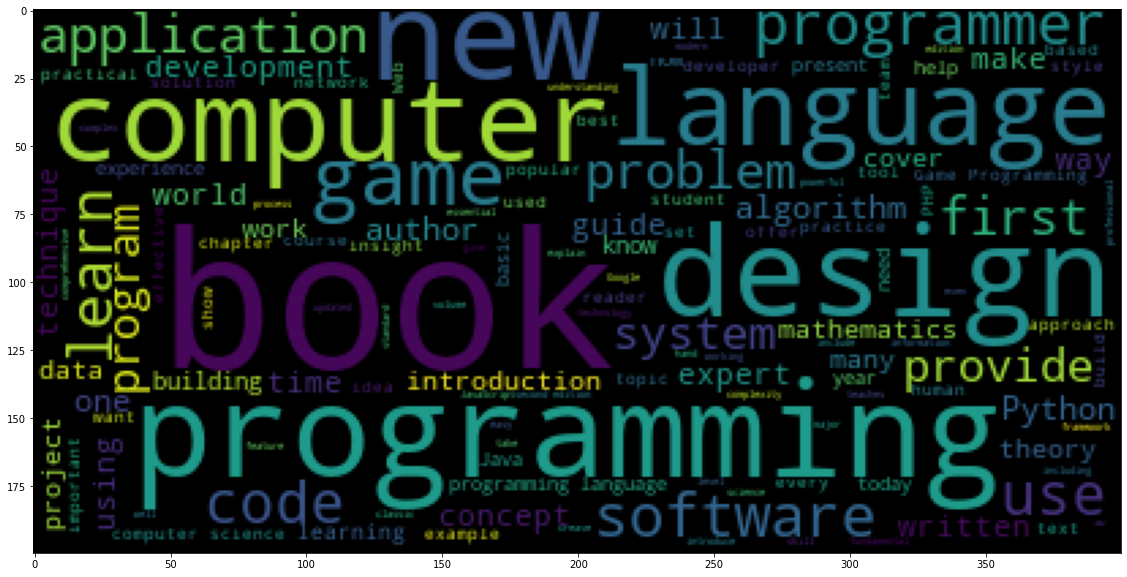

In [121]:
from wordcloud import WordCloud, STOPWORDS
wocl=WordCloud(stopwords=STOPWORDS).generate(" ".join(df["Description"].tolist()))
plt.figure(figsize=(25,10))
plt.imshow(wocl)

In [122]:
result.drop(['Type'],inplace=True,axis=1)
result

,max,mean,min
0,896,896.00,896
1,3168,614.46,105
2,422,283.40,50
3,1214,406.68,128
4,288,249.00,210
5,787,386.00,176


In [123]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [124]:
df_out=result.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

In [125]:
np.sort(df_scores)[0:50]

array([-1.05658731, -1.01644149, -1.01370288, -0.98139986, -0.96839801,
       -0.96839801])

In [126]:
result

,max,mean,min
0,896,896.00,896
1,3168,614.46,105
2,422,283.40,50
3,1214,406.68,128
4,288,249.00,210
5,787,386.00,176


In [134]:
result

,max,mean,min
0,896,896.00,896
1,3168,614.46,105
2,422,283.40,50
3,1214,406.68,128
4,288,249.00,210
5,787,386.00,176
